In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
df = pd.read_csv('iris.data')

# Load Data
* Loaded the data and filled in the missing header row by refering https://archive.ics.uci.edu/ml/datasets/Iris

In [6]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Understand the data
* Description of data 
* Understand the quote "One class is linearly separable from the other 2; the latter are NOT linearly separable from each other." by visualizing

In [7]:
#to display stats about data
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
#to check datatypes and missingvalues
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
#to count the number of classes in species and to check if data is equally distributed among the diffrent classes.
df['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

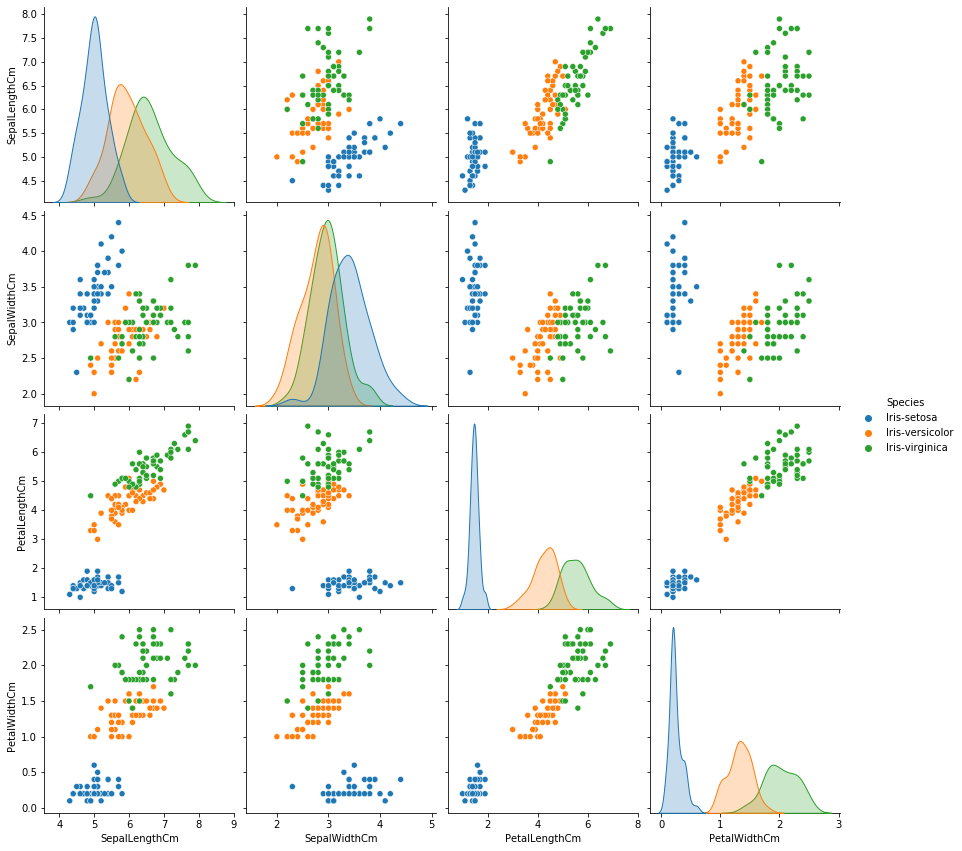

In [17]:
#Understand the quote "One class is linearly separable from the other 2; the latter are NOT linearly separable from each other." by visualizing
sns.pairplot(data = df, hue="Species", height=3, diag_kind="kde")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0888cbe040>,
      dtype=object)

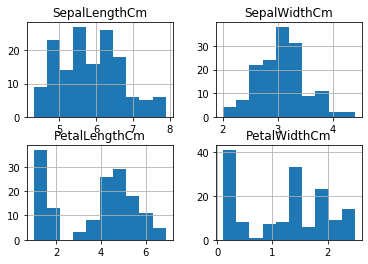

In [18]:
#to check the data distribution
df.hist()

In [19]:
#to check correlation
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


### Label Encoder
* To scale data

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [21]:
df['Species'] = le.fit_transform(df['Species'])

### Split data into train and test
* Seperating feature data as X and target data as Y
* Splitting train and test data for both

In [110]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Species'])
Y = df['Species']
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.30)


In [111]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn = KNeighborsClassifier(11)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

1.0